In [1]:
import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Creating data

In [2]:
np.random.seed(0)
N = 20
x = np.empty((4*N, 2))
means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((2,1),(1,2)))] #
for i in range(4):
    mn = stats.multivariate_normal(means[i], sigmas[i]*0.3)
    x[i*N:(i+1)*N, :] = mn.rvs(N)
a = np.array((0,1,2,3)).reshape((-1, 1))
y = np.tile(a, N).flatten()

# Model building

In [3]:
# clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf.fit(x, y)
y_hat = clf.predict(x)
acc = accuracy_score(y, y_hat)
np.set_printoptions(suppress=True)
print(u'预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc*4*N), 100*acc))
# decision_function
print(clf.decision_function(x))
print(y_hat)

预测正确的样本个数：66，正确率：82.50%
[[ 2.09887682  3.09512828 -0.11808989  0.92408478]
 [ 3.21992603  2.12444698 -0.22925992  0.88488691]
 [ 2.02778059  3.05186938 -0.05966688  0.9800169 ]
 [ 3.10483818  2.04013998 -0.13845534  0.99347718]
 [ 3.17453664  1.0132656  -0.21401121  2.02620897]
 [ 3.21529782  2.06038428 -0.24161771  0.96593561]
 [ 3.12571375  2.04129328 -0.15865703  0.99165   ]
 [ 3.14878032  2.03468594 -0.18305871  0.99959245]
 [ 3.08032985  2.0622269  -0.10855285  0.96599611]
 [ 3.09632999  0.98769371 -0.14393664  2.05991294]
 [ 3.28494159  0.9138264  -0.34870045  2.14993246]
 [ 3.07957773  1.01585878 -0.12004909  2.02461258]
 [ 0.98841131  3.05301829  0.97930861  0.97926179]
 [ 3.1394941   0.99907418 -0.18333368  2.0447654 ]
 [ 3.16013808  2.12206083 -0.17116002  0.88896111]
 [ 3.16257008  2.02350794 -0.19955387  1.01347585]
 [ 2.08991392  0.89570153 -0.16190789  3.17629244]
 [ 3.17203072  0.99366444 -0.21672176  2.0510266 ]
 [ 3.15933974  2.09947277 -0.17633606  0.91752356]
 [ 3.15

# Plot

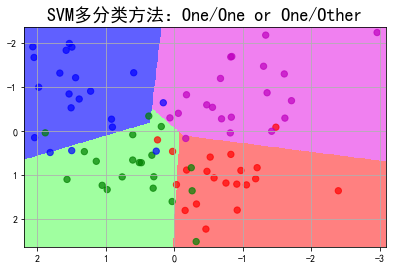

In [4]:
def extend(a, b, r):
    x = a - b
    m = (a + b) / 2
    return m-r*x/2, m+r*x/2

x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1_min, x1_max = extend(x1_min, x1_max, 1.05)
x2_min, x2_max = extend(x2_min, x2_max, 1.05)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_test = clf.predict(x_test)
y_test = y_test.reshape(x1.shape)
cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(b=True)
plt.tight_layout(pad=2.5)
plt.title(u'SVM多分类方法：One/One or One/Other', fontsize=18)
plt.show()